# RecipeClassification_EvaluationMetric

### AUC - ROC for Multi-Class Classification

#### AUC - ROC Multiclass classificaton problems by using the One vs All techniques.

There are four classes in Cuisine variable 0, 1 ,2 & 3 respectively. The ROC for class 0 will be generated as classifying 0 against not 0,i.e. 1,2 & 3. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

The ROC curve for multi-class classification models can be determined as below:

#### Importing necessary libraries

In [1]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
recipe = pd.read_csv('D:/Manjiri/Internshala_Sonu/Data/recipe_classification.csv')

### Function to Label Encode Categorical variables

It is essential to encode categorical features into numeric values before applying machine learning algorithm. For a recipe dataset, I am going to perform label encoding on all categorical features and also dropping unnecessary columns. I will use the popular scikit-learn library to develop machine learning algorithm.

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [4]:
#Initializing label encoder
le = LabelEncoder()

#Initalizing Label Encoder
le = LabelEncoder()

categorical_data = recipe.select_dtypes(exclude=np.number)
categorical_col = categorical_data.columns

#Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        recipe[feature] = le.fit_transform(recipe[feature])
    except:
            print('Error Encoding'+ feature)

In [5]:
recipe.to_csv('D:/Manjiri/Internshala_Sonu/Data/recipe_classification.csv', index = False)

In [6]:
recipe.head()

,Recipe_name,Category,Cuisine,Preptime,Tottime,Yield,Nutrition
0,43,1,2,5,10,5,174
1,231,5,2,10,20,12,286
2,43,1,2,5,10,5,174
3,231,5,2,10,20,12,286
4,320,3,3,10,30,12,136


In [7]:
print('Shape of the data is : ', recipe.shape)

Shape of the data is :  (558, 7)


#### PREPARING TRAIN & TEST DATA

In [8]:
#split into train/test sets
#Separating independent & dependent variables
y = recipe['Category']
X = recipe.drop(['Category'],axis = 1)

In [9]:
#creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, stratify=y, test_size = 0.3)

#### FITTING THE MODEL AND PREDICTING THE VALUES

In [10]:
#runLogisticRegression 
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

#### GETTING THE METRIC TO CHECK OUR MODEL PERFORMANCE

In [11]:
# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

In [12]:
n_class = 4

In [13]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:, i], pos_label =i)

<Figure size 1440x288 with 0 Axes>

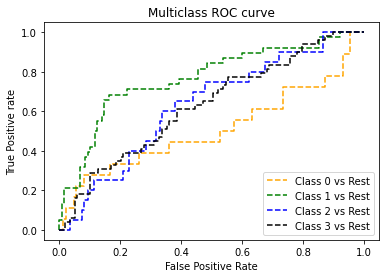

<Figure size 1440x288 with 0 Axes>

In [14]:
#plotting
plt.plot(fpr[0], tpr[0], linestyle = '--', color = 'orange', label = 'Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle = '--', color = 'green', label = 'Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle = '--', color = 'blue', label = 'Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle = '--', color = 'black',label = 'Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.figure(figsize=(20,4))

In [15]:
pred_score = pred.reshape(-1,1)

In [16]:
def multiclass_roc_auc_score(y_test, pred_score, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(pred_score)
    return roc_auc_score(y_test, pred_score, average=average)

In [17]:
multiclass_roc_auc_score(y_test, pred_score)

0.4129629629629629

In [18]:
#rundecisiontreeclassifier 
clf2 = OneVsRestClassifier(DecisionTreeClassifier())
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
pred_prob2 = clf2.predict_proba(X_test)

In [19]:
pred_score2 = pred2.reshape(-1,1)

In [20]:
def multiclass_roc_auc_score(y_test, pred_score2, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(pred_score2)
    return roc_auc_score(y_test, pred_score2, average=average)

In [21]:
multiclass_roc_auc_score(y_test, pred_score2)

0.48333333333333334

In [22]:
#run RandomForestClassifier
clf3 = OneVsRestClassifier(RandomForestClassifier())
clf3.fit(X_train, y_train)
pred3 = clf3.predict(X_test)
pred_prob3 = clf3.predict_proba(X_test)

In [23]:
pred_score3 = pred3.reshape(-1,1)

In [24]:
def multiclass_roc_auc_score(y_test, pred_score3, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(pred_score3)
    return roc_auc_score(y_test, pred_score3, average=average)

In [25]:
multiclass_roc_auc_score(y_test, pred_score3)

0.5018518518518518